# DMW - C2 Assignment 2
## Fast Rates for SVM Using Gaussian Kernels

------

### Importing the libraries

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics.pairwise import chi2_kernel
from sklearn.metrics import confusion_matrix
import seaborn as sns

### Loading data from csv

In [6]:
data = pd.read_csv("letter-recognition.csv")
data

,lettr,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


### Splitting data into Train and Test

In [7]:
X = np.array(data.iloc[:, 1:])
y = np.array(data.iloc[:, 0])

print("X shape =", X.shape)
print("y shape =", y.shape)

X shape = (20000, 16)
y shape = (20000,)


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 101)

print("X_train shape =", X_train.shape)
print("X_test shape  =", X_test.shape)
print("y_train shape =", y_train.shape)
print("y_test shape  =", y_test.shape)

X_train shape = (16000, 16)
X_test shape  = (4000, 16)
y_train shape = (16000,)
y_test shape  = (4000,)


### Building the Model

In [28]:
# hellinger kernel
def hellinger(X, Y):
    return norm(np.sqrt(X) - np.sqrt(Y)) / np.sqrt(2)

# intersection kernel
def intersection(data_1, data_2):

    if np.any(data_1 < 0) or np.any(data_2 < 0):
        warnings.warn('Min kernel requires data to be strictly positive!')

    kernel = np.zeros((data_1.shape[0], data_2.shape[0]))

    for d in range(data_1.shape[1]):
        column_1 = data_1[:, d].reshape(-1, 1)
        column_2 = data_2[:, d].reshape(-1, 1)
        kernel += np.minimum(column_1, column_2.T)

    return kernel

In [29]:
# linear kernel
model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)
y_pred_linear = model_linear.predict(X_test)
print("Linear Kernel Done")

# rbf kernel
non_linear_model = SVC(kernel='rbf')
non_linear_model.fit(X_train, y_train)
y_pred_rbf = non_linear_model.predict(X_test)
print("RBF Kernel Done")

# Intersection Kernel
model_intersection = SVC(kernel=intersection, C=1E01,tol=0.1)
model_intersection.fit(X_train, y_train)
predicted_intersection = model_intersection.predict(X_test)
print("Intersection Kernel Done")

# Hellinger Kernel
model_hellinger = SVC(kernel='poly', C=1E01,tol=0.1)
model_hellinger.fit(X_train, y_train)
predicted_hellinger = model_hellinger.predict(X_test)
print("Hellinger Kernel Done")

# Chi^2 Kernel
model_chi2 = SVC(kernel=chi2_kernel, C=1E01,tol=0.1)
model_chi2.fit(X_train, y_train)
predicted_chi2 = model_chi2.predict(X_test)
print("Chi^2 Kernel Done")

Linear Kernel Done
RBF Kernel Done
Intersection Kernel Done
Hellinger Kernel Done
Chi^2 Kernel Done


### Testing the Model

In [31]:
print("Accuracy of Linear Kernel : ", metrics.accuracy_score(y_true=y_test, y_pred=y_pred_linear))
print("Accuracy of RBF Kernel : ", metrics.accuracy_score(y_true=y_test, y_pred=y_pred_rbf))
print("Accuracy of Intersection kernel : ", metrics.accuracy_score(y_true=y_test, y_pred=predicted_intersection))
print("Accuracy of Hellinger kernel : ", metrics.accuracy_score(y_true=y_test, y_pred=predicted_hellinger))
print("Accuracy of Chi^2 kernel : ", metrics.accuracy_score(y_true=y_test, y_pred=predicted_chi2))

Accuracy of Linear Kernel :  0.85375
Accuracy of RBF Kernel :  0.92525
Accuracy of Intersection kernel :  0.92175
Accuracy of Hellinger kernel :  0.9545
Accuracy of Chi^2 kernel :  0.97175


### Confusion martix

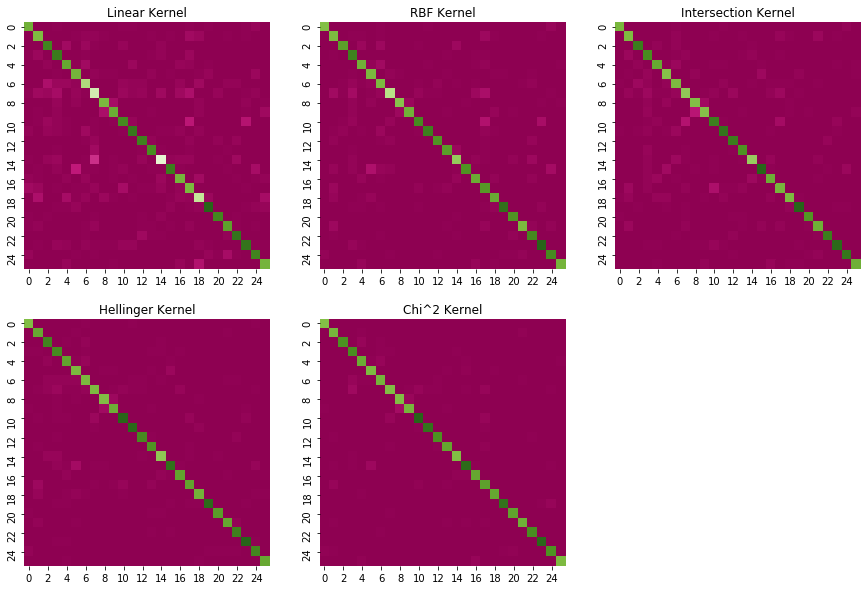

In [38]:
plt.subplots(figsize=(15,10))

plt.subplot(2,3,1)
cf_matrix = confusion_matrix(y_test, y_pred_linear)
plt.title('Linear Kernel')
sns.heatmap(cf_matrix, cmap="PiYG", cbar=False)

plt.subplot(2,3,2)
cf_matrix = confusion_matrix(y_test, y_pred_rbf)
plt.title('RBF Kernel')
sns.heatmap(cf_matrix, cmap="PiYG", cbar=False)

plt.subplot(2,3,3)
cf_matrix = confusion_matrix(y_test, predicted_intersection)
plt.title('Intersection Kernel')
sns.heatmap(cf_matrix, cmap="PiYG", cbar=False)

plt.subplot(2,3,4)
cf_matrix = confusion_matrix(y_test, predicted_hellinger)
plt.title('Hellinger Kernel')
sns.heatmap(cf_matrix, cmap="PiYG", cbar=False)

plt.subplot(2,3,5)
cf_matrix = confusion_matrix(y_test, predicted_chi2)
plt.title('Chi^2 Kernel')
sns.heatmap(cf_matrix, cmap="PiYG", cbar=False)

plt.show()